
# Prediction using Unsupervised Machine Learning


## OBJECTIVE-Clustering of Iris Dataset

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


## ALGORITHM USED - K-Means:

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.


## Workflow behind Implemention of K-Means Clustering:

Choose the number of clusters k

Select k random points from the data as centroids

Assign all the points to the closest cluster centroid


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
data = pd.read_csv("E:/Python Data Analysis/Iris (3).csv")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Sample Data

In [16]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
print("(rows, columns):",data.shape)

(rows, columns): (150, 6)


In [5]:
print("Duplicated values:",data.duplicated().sum())

Duplicated values: 0


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Spliting the data

In [9]:
x = data.iloc[:,[1,2,3,4]].values
y = data.iloc[:,-1].values

### Finding the optimum number of clusters using Elbow method

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


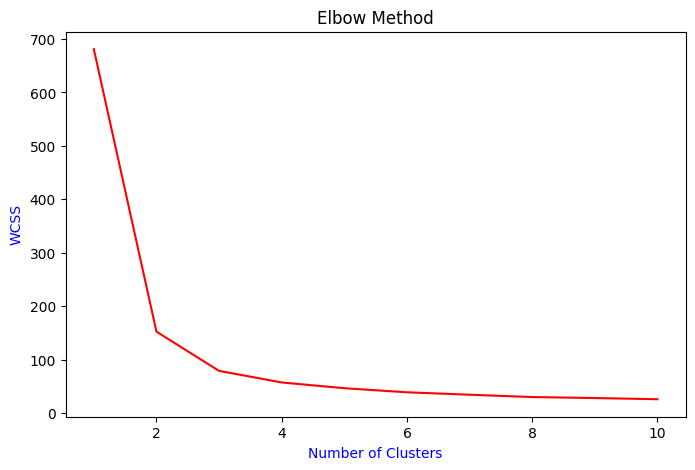

In [11]:
plt.figure(figsize = (8,5))
plt.plot(range(1,11), wcss, color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters',color  = 'blue')
plt.ylabel('WCSS', color = 'blue')
plt.show()

### Training the Algorithm

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
y_pred = kmeans.fit_predict(x)

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Visualization

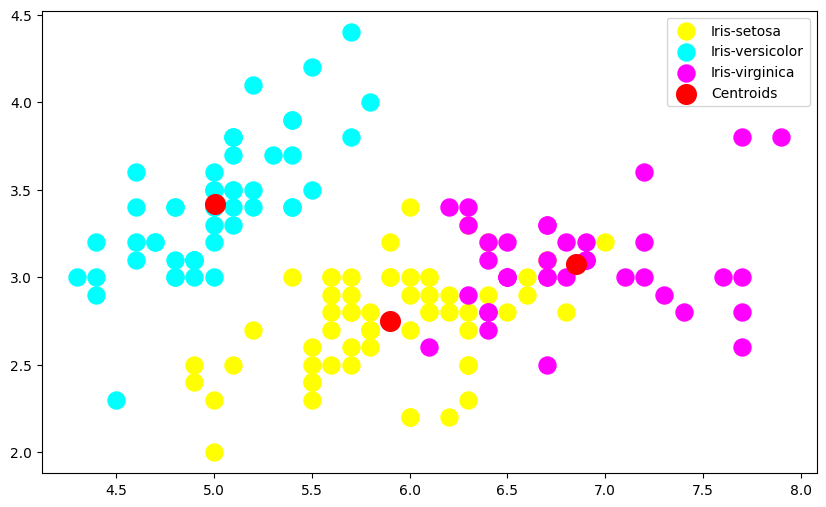

In [15]:
plt.figure(figsize = (10,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], color = 'yellow', s = 150, label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], color = 'cyan', s = 150, label = 'Iris-versicolor')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], color = 'magenta', s = 150, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color = 'red', s = 200, label = 'Centroids')
plt.legend()
plt.show()

### Thank You